In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data_path = "../paper_results"
exps = os.listdir(data_path)
reward_results = {}

key_to_plot = "ep_surprise" # could be "ep_return"

for exp in exps:
    if os.path.isdir(os.path.join(data_path, exp)):
        
        #join all words but the last _seed:1
        exp_name = "_".join(exp.split("_")[:-1])
        if exp_name not in reward_results:
            reward_results[exp_name] = []
            
        file = os.path.join(data_path, exp, "log.csv")
        reward_data = pd.read_csv(file)
        reward_results[exp_name].append(reward_data[key_to_plot])

In [3]:
reward_results

{'dqn_griddly-MazeEnv_smin_buffer:bernoulli_withExtrinsic:False_softreset:0_reweard_normalization:1_exp_rew:0_death_cost:0_survival_rew:0': [0       0.021482
  1       0.020092
  2       0.022286
  3       0.021263
  4       0.023057
            ...   
  6467    0.008880
  6468    0.008880
  6469    0.008876
  6470    0.009299
  6471         NaN
  Name: ep_surprise, Length: 6472, dtype: float64,
  0       0.022910
  1       0.016890
  2       0.021129
  3       0.019190
  4       0.020017
            ...   
  6465    0.008674
  6466    0.008674
  6467    0.009026
  6468    0.008674
  6469    0.008674
  Name: ep_surprise, Length: 6470, dtype: float64,
  0       0.021939
  1       0.020840
  2       0.023470
  3       0.017800
  4       0.016353
            ...   
  6466    0.008674
  6467    0.008674
  6468    0.008674
  6469    0.009020
  6470    0.000000
  Name: ep_surprise, Length: 6471, dtype: float64],
 'dqn_tetris_none_buffer:bernoulli_withExtrinsic:False_softreset:0_reweard_norma

In [4]:
# make sure for each key in results, all the lists of rewards in the key are of the same length (which should be the max length common to all)
min_lens = {}
for key in reward_results:
    min_len = min([len(x) for x in reward_results[key]])
    reward_results[key] = [x[:min_len] for x in reward_results[key]]
    min_lens[key] = min_len

In [5]:
# select only X points
num_points = 20
for key in reward_results.keys():
    reward_results[key] = np.array(reward_results[key])
    indices = np.linspace(0, reward_results[key].shape[1]-1, num_points, dtype=int)
    reward_results[key] = reward_results[key][:, indices]

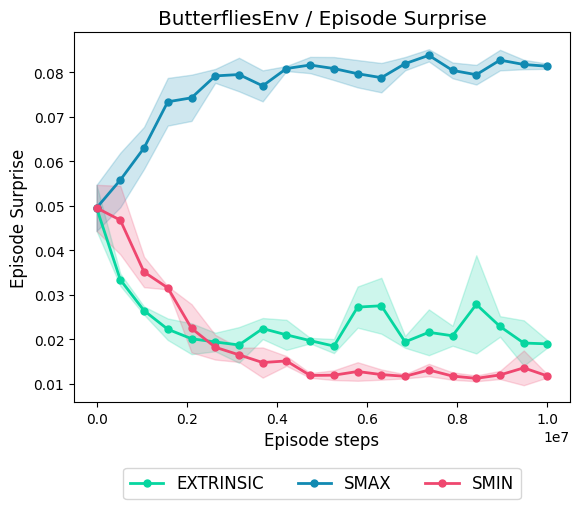

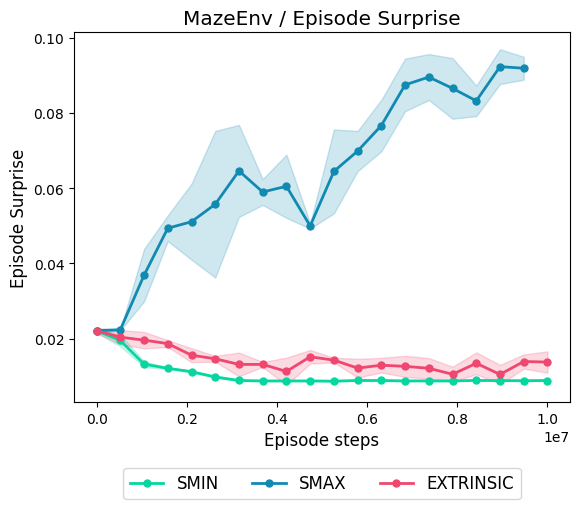

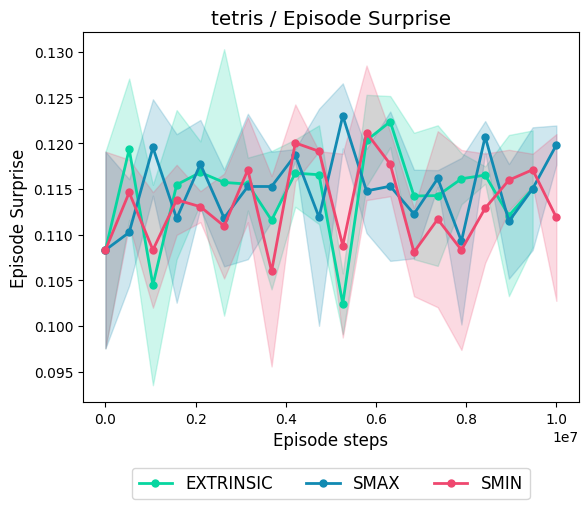

: 

In [6]:
env_names = ["ButterfliesEnv", "MazeEnv", "tetris"]
# one color for S-Max, S-Min, Extrinisc, S-Adapt
colors = ["#06d6a0", "#118ab2", "#ef476f", "#073b4c"]

for env in env_names:
    fig, ax = plt.subplots()
    idx_ = 0
    for exp in reward_results:
        if env not in exp:
            continue
        
        exp_name = exp.split("_")[2].upper()
        if exp_name == "NONE": exp_name = "EXTRINSIC"
        
        if key_to_plot == "ep_return":
            metric_title = "Episode Return"
        elif key_to_plot == "ep_surprise":
            metric_title = "Episode Surprise"
        else:
            raise ValueError("Invalid key_to_plot")
        
        env_title = env.capitalize()
        env_title = env_title.replace("Env", "")
        env_title = env + " / " + metric_title
        
        mean = reward_results[exp].mean(axis=0)
        std = reward_results[exp].std(axis=0)
        x_axis = np.linspace(0, 10_000_000, num_points)
        
        ax.plot(x_axis, mean, linewidth=2, marker='o', markersize=5, c=colors[idx_], label=exp_name)
        ax.fill_between(x_axis, mean+std, mean-std, alpha=0.2, color=colors[idx_])
        # put legend outside the plot. center bottom
        ax.legend(loc='center', bbox_to_anchor=(0.5, -0.22), ncol=4, fontsize="large")
        ax.set_title(env_title, fontsize="x-large")
        ax.set_xlabel("Episode steps", fontsize="large")
        ax.set_ylabel(metric_title, fontsize="large")
        idx_ += 1